In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
path_to_data = '/Users/janbraunsdorff/Studienarbeit-projekt/data'
path_to_validation_annotation = path_to_data + "/validation.csv"
path_to_training_annotation = path_to_data + "/training.csv"
path_to_validatoin_data = path_to_data + '/boneage-validation-dataset/'
path_to_training_data = path_to_data + '/boneage-training-dataset/'
path = path_to_data + '/pickel/v3'

(-0.5, 2569.5, 2039.5, -0.5)

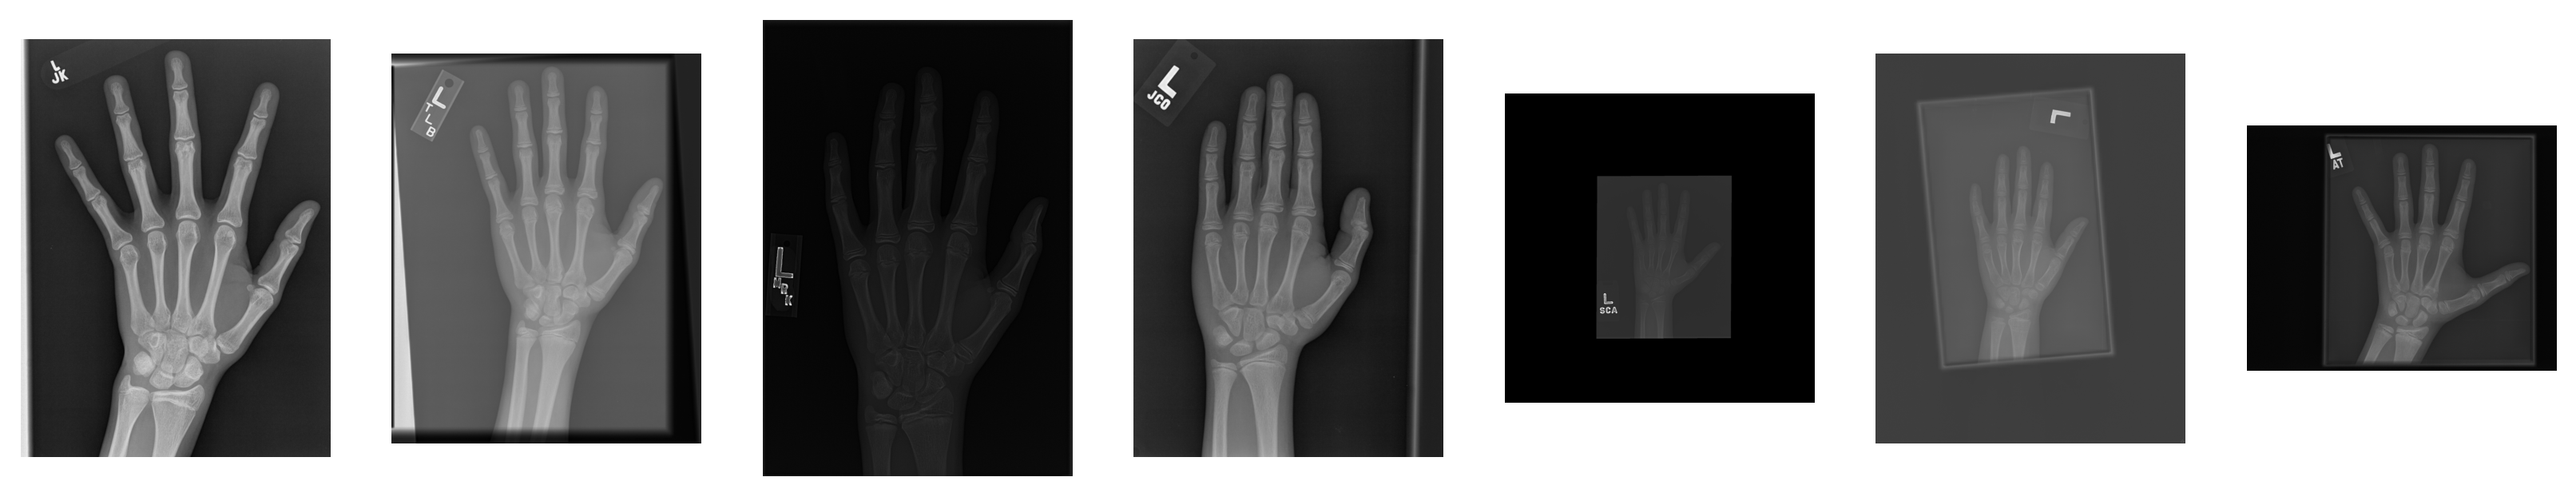

In [20]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["figure.dpi"] = 256
f = plt.figure()
f.add_subplot(1, 7, 1)
plt.imshow(cv2.imread(path_to_training_data + '1377.png'), cmap='gray')
plt.axis('off')
f.add_subplot(1, 7, 2)
plt.imshow(cv2.imread(path_to_training_data + '2065.png'), cmap='gray')
plt.axis('off')
f.add_subplot(1, 7, 3)
plt.imshow(cv2.imread(path_to_training_data + '3400.png'), cmap='gray')
plt.axis('off')
f.add_subplot(1, 7, 4)
plt.imshow(cv2.imread(path_to_training_data + '1380.png'), cmap='gray')
plt.axis('off')
f.add_subplot(1, 7, 5)
plt.imshow(cv2.imread(path_to_training_data + '2440.png'), cmap='gray')
plt.axis('off')
f.add_subplot(1, 7, 6)
plt.imshow(cv2.imread(path_to_training_data + '1658.png'), cmap='gray')
plt.axis('off')
f.add_subplot(1, 7, 7)
plt.imshow(cv2.imread(path_to_training_data + '1780.png'), cmap='gray')
plt.axis('off')

In [7]:
def p1(img, resize_to=500):
    img = cv2.resize(img, (resize_to, resize_to), interpolation=cv2.INTER_LINEAR)
    return img

In [5]:
def p2(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return bgr

In [6]:
def p3(img, resize_to=500, reduce_to=380):
    x = y = (resize_to - reduce_to) // 2
    h = w = reduce_to
    img = img[y:y + h, x:x + w]
    return img

In [7]:
def p4(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return img

In [8]:
def p5(img):
    kernel = np.ones((2,2),np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return img

In [9]:
def p6(img, out_to=256):
    img = cv2.resize(img, (out_to, out_to), interpolation=cv2.INTER_LINEAR)
    return img

In [10]:
def process_img(img, resize_to = 500, reduce_to = 380, out_to = 256):
    img = p1(img, resize_to=reduce_to)
    img = p2(img)
    img = p3(img, resize_to=resize_to, reduce_to=reduce_to)
    img = p4(img)
    img = p5(img)
    img = p6(img, out_to=out_to)
    return img

In [11]:
def print_prcessed(path):
    plt.rcParams["figure.figsize"] = (16, 5)
    plt.rcParams["figure.dpi"] = 256
    img = cv2.imread(path)
    num = 7
    resize_to = 500
    reduce_to = 380
    out_to = 299


    f = plt.figure()

    f.add_subplot(1, num, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Original')

    img = p1(img, resize_to=reduce_to)
    f.add_subplot(1, num, 2)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Resize')

    img = p2(img)
    f.add_subplot(1, num, 3)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('CLAHE')


    img = p3(img, resize_to=resize_to, reduce_to=reduce_to)
    f.add_subplot(1, num, 4)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('CROP')

    img = p4(img)
    f.add_subplot(1, num, 5)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('CLHAE')

    img = p5(img)
    f.add_subplot(1, num, 6)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Open')

    img = p6(img, out_to=out_to)
    f.add_subplot(1, num, 7)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('CROP')


    plt.imshow(img, cmap='gray')

In [12]:
def get_img(aug):
    img = cv2.imread(path_to_training_data + "1377.png")
    img = process_img(img, out_to = 299)
    img = torch.tensor(img).float()
    img = img.permute(2,0,1)
    img = aug(img)
    img = img.permute(1,2,0) / 255.0
    return img

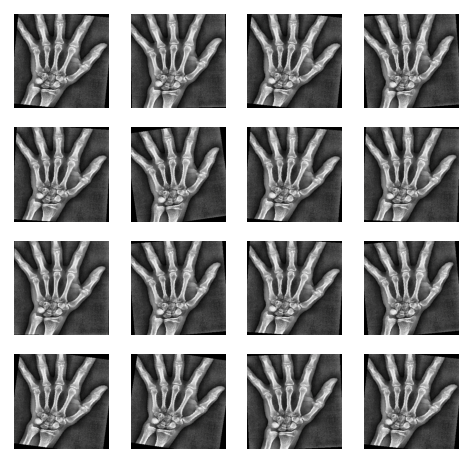

In [13]:
n = 16
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["figure.dpi"] = 144
f = plt.figure()
f.tight_layout()

aug = transforms.Compose(
        [
            transforms.RandomRotation(degrees=10),
        ]
    )


for i in range(n):
    f.add_subplot(4, 4, i+1)
    img = get_img(aug)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

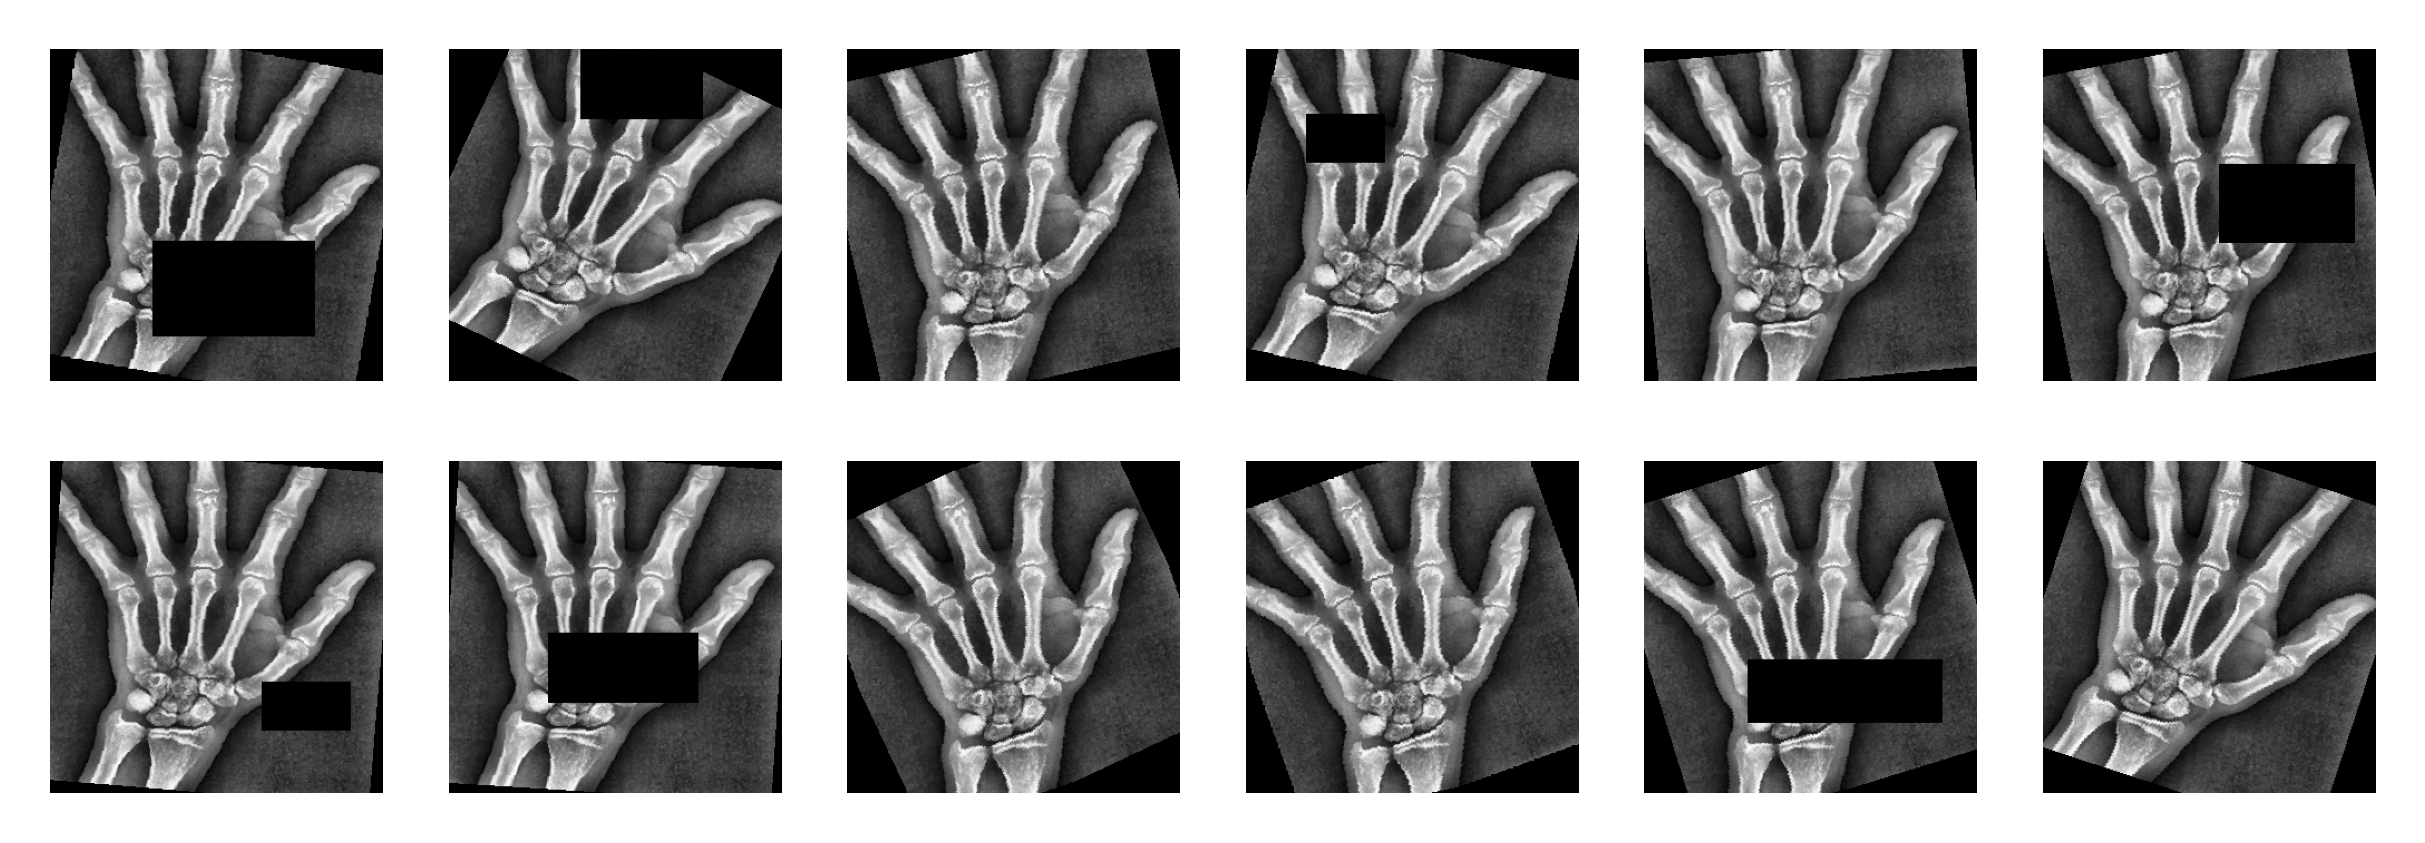

In [16]:
n = 12
plt.rcParams["figure.figsize"] = (6, 2)
plt.rcParams["figure.dpi"] = 500
f = plt.figure()
f.tight_layout()

aug = transforms.Compose(
        [
            transforms.RandomRotation(degrees=10),
            transforms.RandomApply([
                transforms.RandomAffine(degrees=30)
            ], p=0.7),
            transforms.RandomErasing(p=0.4, scale=(0.02, 0.2), ratio=(0.1, 0.7))

        ]
    )


for i in range(n):
    f.add_subplot(2, 6, i+1)
    img = get_img(aug)
    plt.imshow(img)
    plt.axis('off')

In [14]:
img = cv2.imread(path_to_training_data + "1377.png")
img = process_img(img)

In [15]:
class Patches(nn.Module):
  def __init__(self, patch_size):
    super(Patches, self).__init__()
    self.patch_size = patch_size

  def forward(self, images):
    # 256, 3, 72, 72
    batch = images.size()[0]
    patches = images.unfold(1, 3, 3).unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
    patches = patches.squeeze(1)
    patches = patches.resize(batch, 16*16 ,3 * self.patch_size* self.patch_size)
    return patches

/usr/local/lib/python3.9/site-packages/torch/tensor.py:447: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


<Figure size 576x576 with 0 Axes>

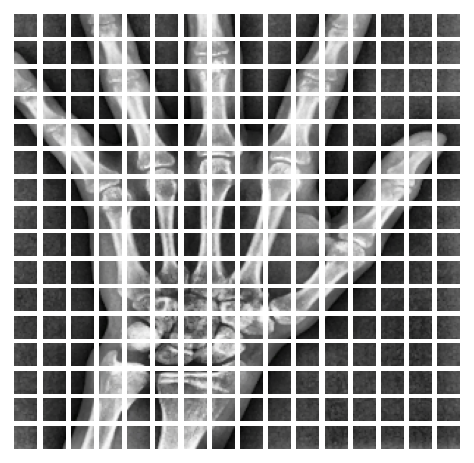

In [16]:
plt.figure(figsize=(4,4))
n = 16
plt.figure(figsize=(4,4))
patches = Patches(patch_size=16)(torch.tensor(img).permute(2,0,1).unsqueeze(0))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i+1)
    patch_img = patch.reshape(3, 16, 16).permute(1,2,0)
    plt.imshow(patch_img.numpy())
    plt.axis('off')


(-0.5, 255.5, 255.5, -0.5)

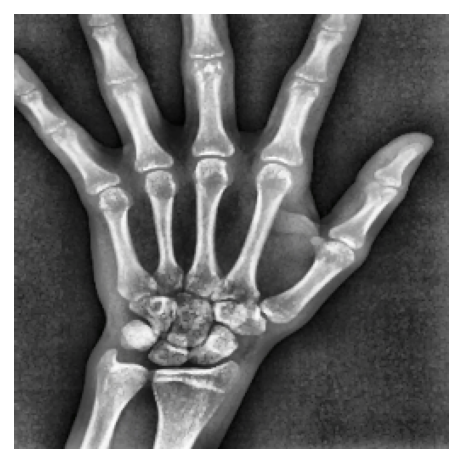

In [17]:
plt.imshow(img)
plt.axis('off')

In [11]:
content = []
with open('/Users/janbraunsdorff/studienarbeit/log-vit.txt') as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [58]:
def print_plot(acc, loss, c):
    plt.rcParams["figure.figsize"] = (16, 5)
    plt.rcParams["figure.dpi"] = 256
    f = plt.figure()

    ax = f.add_subplot(1, 3, 1)
    for i in acc:
         plt.plot(i)
    plt.xlabel('Epochen')
    plt.ylabel('Genauigkeit')
    plt.title('Durchnittlicher Fehler in Monaten')
    ax.set_ylim(0, 50)
    plt.legend(['Trainig', 'Validation'])

    ax = f.add_subplot(1, 3, 2)
    for i in loss:
         plt.plot(i)
    plt.xlabel('Epochen')
    plt.ylabel('Fehler')
    plt.title('Durchschnittlicher Fehler der Fehlerfunktion')
    ax.set_ylim(0, 3500)
    plt.legend(['Trainig', 'Validation'])


    ax = f.add_subplot(1, 3, 3)
    for i in c:
        plt.plot(i)
    plt.xlabel('Epochen')
    plt.ylabel('Score (c4*2.0 + c12 + c25*0.5) / Anzahl')
    plt.title('Fehlerklassen')
    plt.legend(['Trainig', 'Validation'])
    ax.set_ylim(0, 350)

    plt.show()

In [59]:
# Epoche: 1 [Done] 00:39 loss: 3487.1731, acc: 45.2324, c1: 6.49% c12: 17.91% c24: 34.85% score: 0.4830 | [Test] loss: 1734.8069, acc: 33.6578, c1: 1e+01% c12: 22.32% c24: 41.12% score: 0.6337 

datapoints = []
for l in content:
    val = l.split(' ')
    train_loss = float(val[5][:-1])
    train_acc = float(val[7][:-1].strip())
    train_c1 = float(val[9][:-1])
    train_c12 = float(val[11][:-1])
    train_c24 = float(val[13][:-1])
    train_score = float(val[15])

    val_loss = float(val[19][:-1])
    val_acc = float(val[21][:-1].strip())
    val_c1 = float(val[23][:-1])
    val_c12 = float(val[25][:-1])
    val_c24 = float(val[27][:-1])
    val_score = float(val[29])    

    datapoints.append((train_loss, train_acc, train_c1, train_c12, train_c24, train_score, val_loss, val_acc, val_c1, val_c12, val_c24, val_score))

datapoints = np.array(datapoints).astype(float)


In [60]:
np.max([x[4] for x in datapoints])

99.49

In [61]:

train_losses = [x[0] for x in datapoints]
valid_losses = [x[6] for x in datapoints]

train_acc = [x[1] for x in datapoints]
valid_acc = [x[7] for x in datapoints]

train_score = [x[2] * 2 + x[3] + x[4] * 0.5 for x in datapoints]
val_score = [x[8] * 2 + x[9] + x[10] * 0.5 for x in datapoints]


print_plot(
    acc = [train_acc, valid_acc],
    loss = [train_losses, valid_losses],
    c = [train_score, val_score]
)

In [3]:
import pandas as pd

In [4]:
pd = pd.read_csv('/Users/janbraunsdorff/studienarbeit/result-first.csv', sep=';', header=None)

In [5]:
pd

0      1            2          3          4          5          6   \
0        1  00:24  3498.713531  45.206644   6.502260  18.531441  34.993260   
1        2  00:25  1851.294969  35.024059   7.215923  20.283879  39.782729   
2        3  00:25  1810.004870  34.571367   7.580684  21.132345  40.718420   
3        4  00:24  1770.334148  34.262341   7.564824  20.577274  41.297280   
4        5  00:26  1737.605024  33.883082   7.691698  21.219570  41.709619   
...    ...    ...          ...        ...        ...        ...        ...   
1024  1025  00:24   694.566287  20.765276  14.019507  37.625882  65.847276   
1025  1026  00:27   683.277449  20.597159  14.320831  37.832051  66.648164   
1026  1027  00:26   691.186491  20.635421  14.558719  38.062009  66.584728   
1027  1028  00:27   690.898515  20.691062  14.178098  37.665530  66.489573   
1028  1029  00:25   697.610894  20.739089  14.201887  38.371263  66.219967   

              7            8          9          10         11         12  \
0      49.032591  1743.459859  34.437795   9.473684  19.228070  36.000000   
1      54.607089  1761.572720  34.921243   7.929825  18.245614  36.491228   
2      56.652922  1684.139023  33.753788   7.087719  20.631579  39.438596   
3      56.355563  1653.709201  32.769158   8.842105  22.315789  42.245614   
4      57.457775  1635.819039  33.271347   7.368421  20.421053  40.421053   
...          ...          ...        ...        ...        ...        ...   
1024   98.588534  1104.936155  25.114157  14.175439  35.508772  59.719298   
1025   99.797796  1109.245158  25.121873  14.245614  34.526316  59.017544   
1026  100.471810  1106.076143  25.129567  13.403509  34.807018  59.228070   
1027   99.266513  1103.962435  25.122047  13.684211  35.087719  58.947368   
1028   99.885021  1108.276778  25.168944  13.684211  34.315789  59.157895   

             13  
0     56.175439  
1     52.350877  
2     54.526316  
3     61.122807  
4     55.368421  
...         ...  
1024  93.719298  
1025  92.526316  
1026  91.228070  
1027  91.929825  
1028  91.263158  

[1029 rows x 14 columns]

In [6]:
train_losses =  np.array(pd[2])
valid_losses =  np.array(pd[8])

train_acc =  np.array(pd[3])
valid_acc =  np.array(pd[9])

train_score =  np.array(pd[7])
val_score =  np.array(pd[13])

In [7]:
np.min(train_losses), np.min(valid_losses)

(670.5782791717143, 1097.2734700520834)

In [8]:
np.min(train_acc), np.min(valid_acc)

(20.34014943555549, 25.027442218582117)

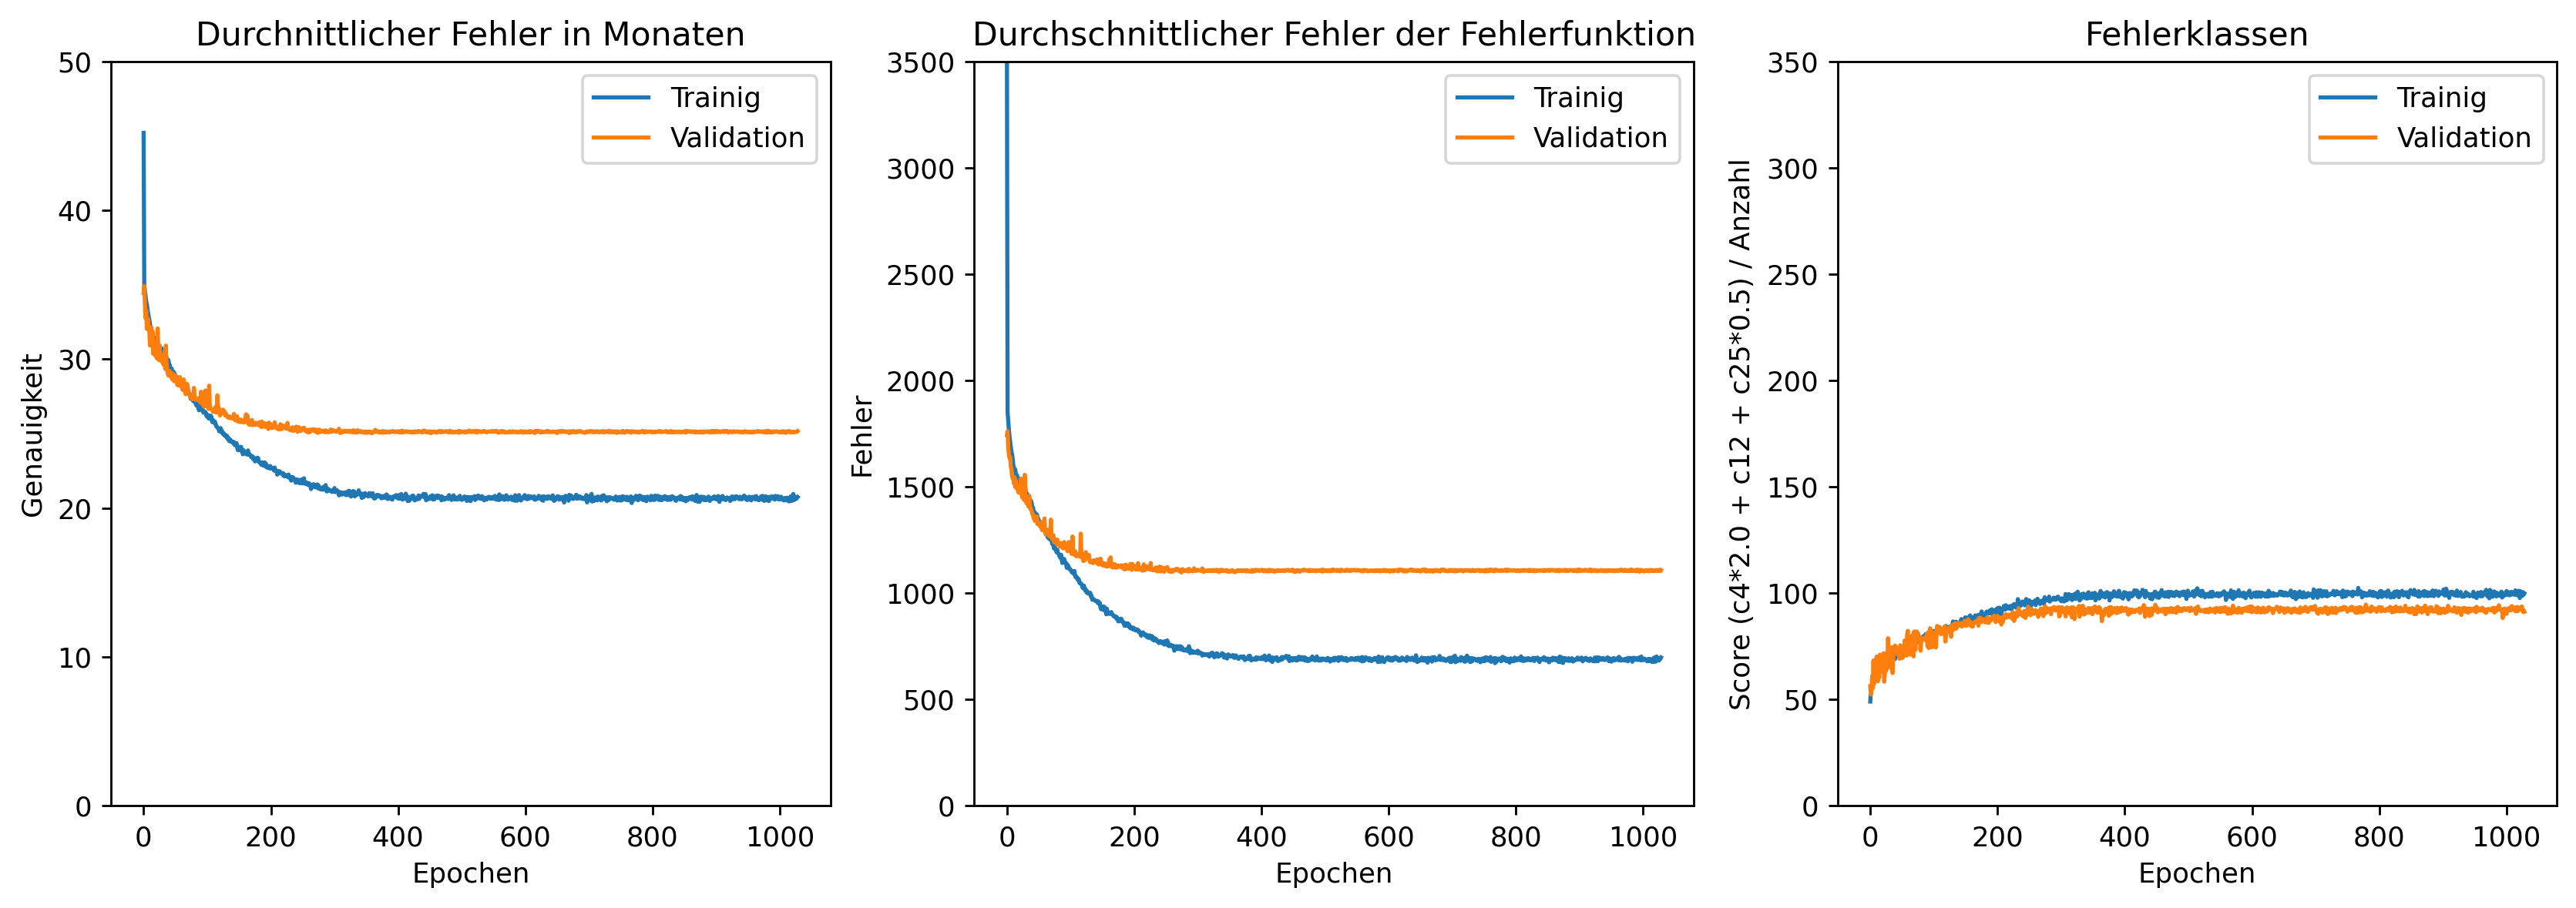

In [66]:
print_plot(
    acc = [train_acc, valid_acc],
    loss = [train_losses, valid_losses],
    c = [train_score, val_score]
)

In [57]:
(100 * 2) + 100 + (100 * 0.5)

350.0